Estimar
$$
I = \iint_{[0,1]^2} f(x,y)\, dx\, dy
$$
con muestreo estratificado. Por ejemplo,
$$
f(x, y) = \exp\bigl(-(x^2 + y^2)\bigr).
$$

1. **Particionar** el cuadrado unitario $[0,1]^2$ en una malla de $k \times k$ subcuadrados. 

# Analisis de las Técnicas de Monte Carlo

Resolver la ecuación con:
1. Monte Carlo Clásico
2. Monte Carlo Estratificado
3. Quasi Monte Carlo con secuencias de Sobol y Halton

Preguntas a discutir:
1. ¿Cómo varía la varianza en los diferentes métodos de solución (Monte Carlo normal, estratificado, Sobol y Halton)?
2. ¿Cómo afecta el tamaño de la muestra a la varianza en cada método?
3. ¿Qué efecto tiene el número de estratificaciones sobre la varianza, la precisión del problema y el tiempo de ejecución?
4. ¿Cómo afecta el rendimiento computacional el uso de las secuencias de Sobol y Halton al aumentar el número de muestras?
5. ¿Existen diferencias en la distribución espacial de los puntos generados por Sobol y Halton? ¿Cómo pueden estas diferencias impactar la precisión del problema?
6. ¿Cómo afecta la dimensión del problema a la eficiencia y precisión de los cuatro métodos estudiados?
7. ¿Cómo influye la función de integración en el desempeño de cada método? ¿Se comportan igual para funciones suaves que para funciones con discontinuidades o picos?
8. ¿Cuál es la tasa de convergencia observada en cada método?
9. ¿Qué ventajas y desventajas tiene el método de estratificación en comparación con los métodos quasi-Monte Carlo?


In [2]:
import numpy as np
from scipy.stats.qmc import Sobol, Halton

In [24]:
def monte_carlo_2d(F, bounds, n_samples):
    x0, x1, y0, y1 = bounds
    x_samples = np.random.uniform(x0, x1, n_samples)
    y_samples = np.random.uniform(y0, y1, n_samples)

    samples = F(x_samples, y_samples)
    area = (x1 - x0) * (y1 - y0)
    return area * np.mean(samples)

In [25]:
def mc_stratificada(F, bounds, n_samples, k):
    x0, x1, y0, y1 = bounds
    total_strata = k * k
    samples_per = n_samples // total_strata
    remainder = n_samples % total_strata
    
    dx = (x1 - x0) / k
    dy = (y1 - y0) / k
    
    integral_estimate = 0.0
    
    for i in range(k):
        for j in range(k):
            # Calculate stratum index and sample count
            stratum_idx = i * k + j
            stratum_samples = samples_per + 1 if stratum_idx < remainder else samples_per
            
            # Stratum boundaries
            x_low = x0 + i * dx
            x_high = x_low + dx
            y_low = y0 + j * dy
            y_high = y_low + dy
            
            # Generate samples
            x = np.random.uniform(x_low, x_high, stratum_samples)
            y = np.random.uniform(y_low, y_high, stratum_samples)
            
            # Evaluate function
            f_vals = F(x, y)
            
            # Update integral estimate
            stratum_area = dx * dy
            integral_estimate += stratum_area * np.mean(f_vals)
    return integral_estimate

In [36]:
def sobol_quasi(F, bounds, n_samples):
    x0, x1, y0, y1 = bounds
    engine =  Sobol(d=2, scramble=False)
    samples = engine.random(n_samples)

    x = x0 + samples[:, 0] * (x1 - x0)
    y = y0 + samples[:, 1] * (y1 - y0)
    area = (x1 - x0) * (y1 - y0)
    return area * np.mean(F(x, y))

def halton_quasi(F, bounds, n_samples):
    x0, x1, y0, y1 = bounds
    engine =  Halton(d=2, scramble=False)
    samples = engine.random(n_samples)

    x = x0 + samples[:, 0] * (x1 - x0)
    y = y0 + samples[:, 1] * (y1 - y0)
    area = (x1 - x0) * (y1 - y0)
    return area * np.mean(F(x, y))

In [59]:
def calcular_varianzas(metodo, F, bounds, n_samples, repeat=20, **kwargs):
    estmimates = []
    for _ in range(repeat):
        estmimates.append(metodo(F, bounds, n_samples, **kwargs))
    variance = np.var(estmimates)
    return variance
    
def convergencia(metodo, F, bounds,  muestras , **kwargs):
    estimado_en_n = []
    for N in muestras:
        estimado_en_n.append(metodo(F, bounds, N, **kwargs))

    return estimado_en_n

def medir_tiempos():
    pass

def quasi_comp():
    pass

In [26]:
def integral(x, y):
    return np.exp(- (x**2 + y**2))

bounds = (0, 1, 0, 1)
monte_carlo_2d(integral, bounds, 5000)

0.5607362426113017

In [27]:
mc_stratificada(integral, bounds, 5000, 10)

0.5575355715004406

In [37]:
sobol_quasi(integral, bounds, 2048)

0.5579765855799687

In [39]:
calcular_varianzas(monte_carlo_2d, integral, bounds, 5000)

1.4567016977925164e-05

In [50]:
calcular_varianzas(mc_stratificada, integral, bounds, 5000, k=10)

7.810611856144583e-08

In [58]:
calcular_varianzas(sobol_quasi, integral, bounds, 1024)

1.232595164407831e-32

In [56]:
calcular_varianzas(halton_quasi, integral, bounds, 2)

1.232595164407831e-32

In [71]:
n_muestas = [100, 500, 1000, 2500, 5000, 10000]
medias = convergencia(monte_carlo_2d, integral, bounds, n_muestas)

In [63]:
import matplotlib.pyplot as plt

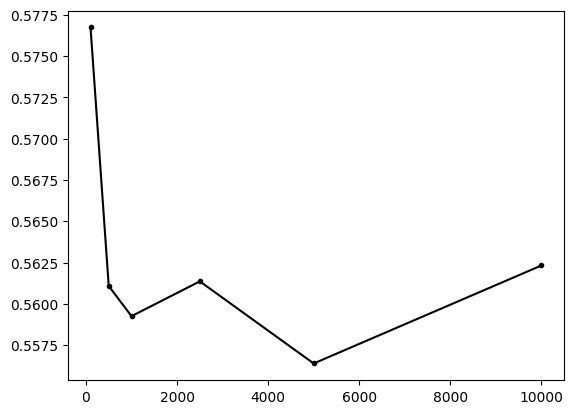

In [72]:
plt.plot(n_muestas, medias, 'k.-')
plt.show()

In [73]:
n_muestas = [100, 500, 1000, 2500, 5000, 10000]
strat_medias = convergencia(mc_stratificada, integral, bounds, n_muestas, k=10)

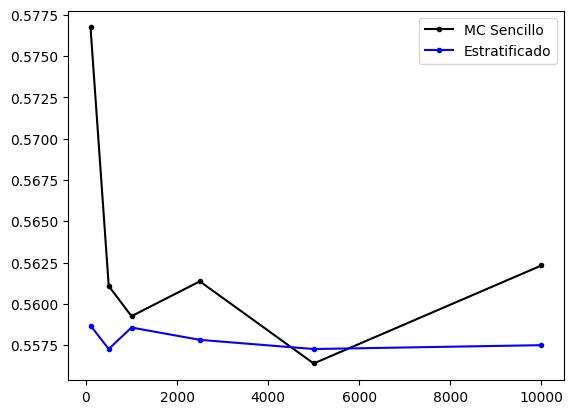

In [74]:
plt.plot(n_muestas, medias, 'k.-', label="MC Sencillo")
plt.plot(n_muestas, strat_medias, 'b.-', label="Estratificado")
plt.legend()
plt.show()

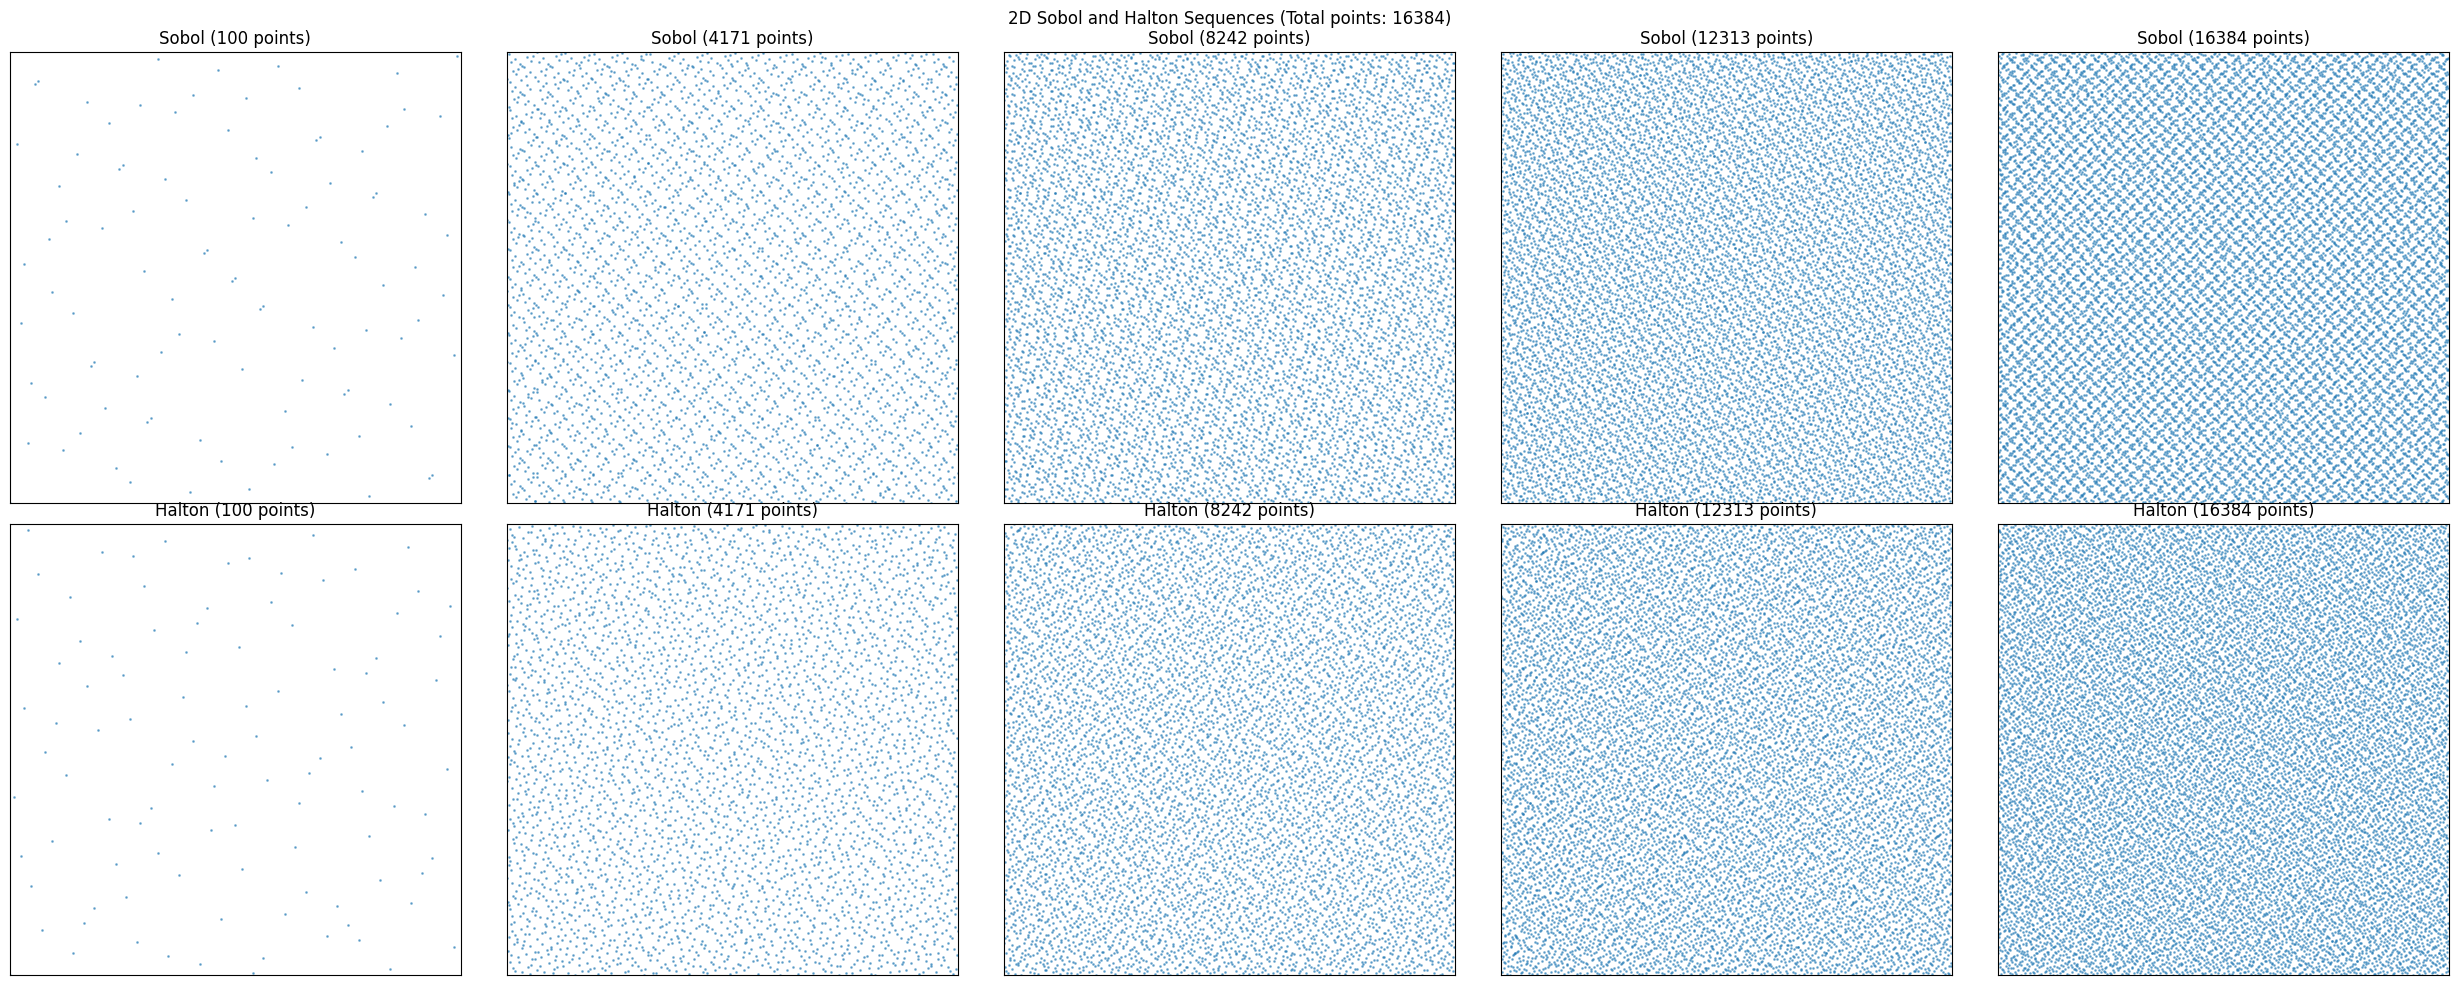

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

def plot_2d_low_discrepancy_sequences(n_points, n_steps=4):
    """
    Plot 2D Sobol and Halton sequences to visualize their patterns.
    
    Args:
    n_points (int): Total number of points to generate.
    n_steps (int): Number of intermediate steps to show (default is 4).
    """
    fig, axs = plt.subplots(2, n_steps, figsize=(5*n_steps, 10))
    fig.suptitle(f"2D Sobol and Halton Sequences (Total points: {n_points})")
    
    # Generate Sobol and Halton sequences
    sobol = qmc.Sobol(d=2, scramble=False)
    halton = qmc.Halton(d=2, scramble=False)
    
    for i, n in enumerate(np.linspace(100, n_points, n_steps, dtype=int)):
        sobol_points = sobol.random(n)
        halton_points = halton.random(n)
        
        # Plot Sobol sequence
        axs[0, i].scatter(sobol_points[:, 0], sobol_points[:, 1], s=1, alpha=0.5)
        axs[0, i].set_title(f"Sobol ({n} points)")
        axs[0, i].set_xlim(0, 1)
        axs[0, i].set_ylim(0, 1)
        
        # Plot Halton sequence
        axs[1, i].scatter(halton_points[:, 0], halton_points[:, 1], s=1, alpha=0.5)
        axs[1, i].set_title(f"Halton ({n} points)")
        axs[1, i].set_xlim(0, 1)
        axs[1, i].set_ylim(0, 1)
    
    for ax in axs.flat:
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_2d_low_discrepancy_sequences(2**14, n_steps=5)


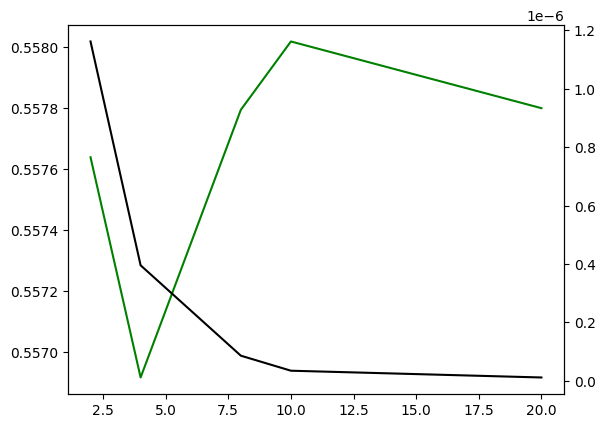

In [95]:
# Variacion de K

k_val = [2, 4, 8, 10, 20]
num_samples = 10000
mean_k = []
var_k = []

for k in k_val:
    mean_k.append(mc_stratificada(integral, bounds, num_samples, k))
    var_k.append(calcular_varianzas(mc_stratificada, integral, bounds, num_samples, k=k))

fig, ax1 = plt.subplots()
ax1.plot(k_val, mean_k, 'g', label='Promedio')

ax2 = ax1.twinx()
ax2.plot(k_val, var_k, 'k', label='Varianza')

plt.show()